# LSST Camera Footprint Filter Demo

This notebook demonstrates the LSST camera footprint filter for LSST opsim based survey simulations (http://astro-lsst-01.astro.washington.edu:8080/) and the output of the JPL based solar system object survey simulator (https://github.com/dirac-institute/survey_simulator). 

In [1]:
from sorcha.modules import PPFootprintFilter as fp

In [2]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
def getSqlData(database,rows_start,nrows):
    """Import dataset from local SQL database
    
    Parameters:
    -----------
    database   ... path to database
    rows_start ... number of row to start
    rows_max   ... number of rows to select
    
    Returns:
    --------
    observations ... pandas dataframe containing observations from JPL database
    """
    con = sql.connect(database)
    observations = pd.read_sql("""SELECT observationId, observationStartMJD as observationStartMJD_TAI, visitTime, visitExposureTime, filter, seeingFwhmGeom as seeingFwhmGeom_arcsec, seeingFwhmEff as seeingFwhmEff_arcsec, fiveSigmaDepth as fieldFiveSigmaDepth_mag , fieldRA as fieldRA_deg, fieldDec as fieldDec_deg, rotSkyPos as fieldRotSkyPos_deg FROM observations order by observationId LIMIT """+str(rows_start)+','+str(nrows), con)
    return observations

## Import LSST Opsim database 
This database contains LSST pointings and environmental information such as seeing.


In [4]:
db_path = "oneline_v2.0.db"

Select the first ten exposures of the LSST survey for testing purposes.

In [5]:
LSSTdf = getSqlData(db_path,0,1)

In [6]:
LSSTdf

,observationId,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg
0,402942,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823


## Grab simulated observations

In [7]:
dfobs = pd.read_csv("footprintFilterValidationObservations.csv", sep='\s+')

In [8]:
dfobs

,ObjID,FieldID,fieldMJD_TAI,Range_LTC_km,RangeRate_LTC_km_s,RA_deg,RARateCosDec_deg_day,Dec_deg,DecRate_deg_day,Obj_Sun_x_LTC_km,...,Obj_Sun_vz_LTC_km_s,Obs_Sun_x_km,Obs_Sun_y_km,Obs_Sun_z_km,Obs_Sun_vx_km_s,Obs_Sun_vy_km_s,Obs_Sun_vz_km_s,phase_deg,V,V(H=0)
0,S0000w6ca,402942.0,60945.035513,344266000.0,9.645862,273.950475,0.145419,-25.409570,-0.034414,171050400.0,...,5.477871,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,23.579048,28.916485,4.915485
1,S0000wkZa,402942.0,60945.035513,93728970.0,24.810874,273.029493,1.592210,-24.398177,-0.243588,154138100.0,...,-2.670822,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,58.765271,25.451943,1.441943
2,S0000wspa,402942.0,60945.035513,330569600.0,21.915557,274.480023,0.072605,-25.283050,0.093505,172974700.0,...,8.064873,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,24.363095,28.799210,4.784210
3,S0000wUea,402942.0,60945.035513,492613400.0,25.078801,273.646543,0.109090,-25.456436,0.005462,177915900.0,...,1.489699,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,16.976109,30.199404,6.167404
4,S0000xl3a,402942.0,60945.035513,200278800.0,30.796080,271.853254,0.734379,-23.453650,-0.003425,155568800.0,...,-0.605902,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,37.584025,27.273330,3.225330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29051,mpc00K8271,402942.0,60945.035513,360725700.0,20.617454,272.594036,0.244908,-25.480627,0.015066,164365000.0,...,3.899935,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,22.787741,22.312084,5.062084
29052,mpc00K9056,402942.0,60945.035513,261587100.0,16.465273,272.172454,0.412457,-25.517282,0.032230,158575700.0,...,6.222693,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,30.279516,21.032581,4.012581
29053,mpc00K9551,402942.0,60945.035513,298658200.0,16.740250,274.477149,0.288844,-26.376947,0.009252,170513400.0,...,4.841374,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,26.624500,21.221274,4.451274
29054,mpc00K9617,402942.0,60945.035513,371087000.0,21.670828,272.019401,0.241333,-24.188684,0.022293,161555100.0,...,4.423580,149626900.0,9189664.0,3981839.0,-2.165552,27.419133,11.778333,22.274549,22.124108,5.154108


These observations all lie on a circle of radius 2.1deg.

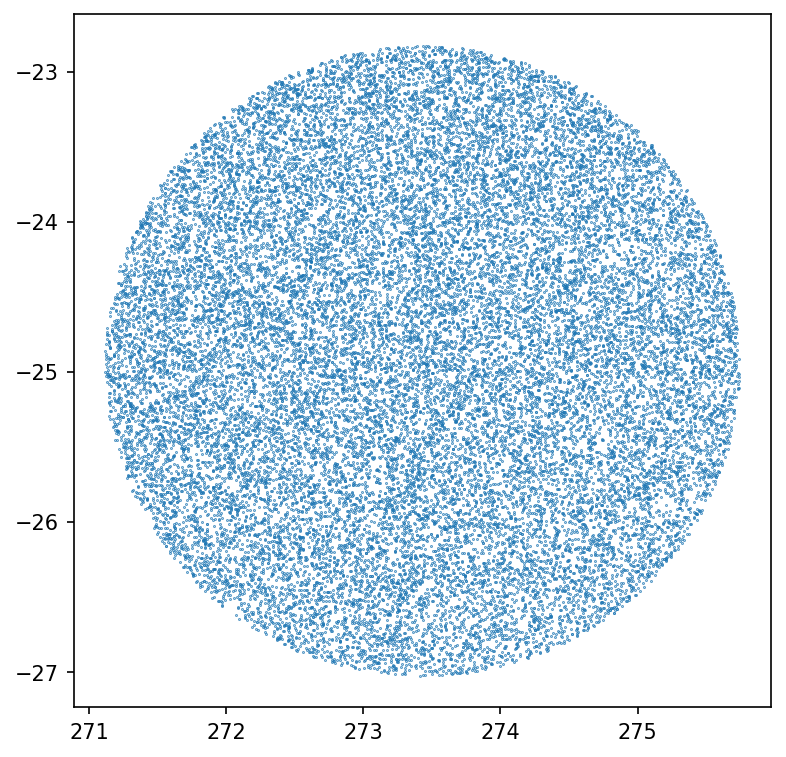

In [9]:
plt.figure(dpi=150,figsize=(6,6))
plt.scatter(dfobs['RA_deg'],dfobs['Dec_deg'],s=0.1)
plt.show()

In [10]:
dfobs = pd.merge(dfobs, LSSTdf, left_on="FieldID", right_on="observationId", how="left")

## Test footprint filter

In [11]:
camera = fp.Footprint("detectors_corners.csv")

In [12]:
df_new=camera.applyFootprint(dfobs)

In [13]:
dfobs_in_fp = dfobs.iloc[df_new[0]]

In [14]:
dfobs_in_fp

,ObjID,FieldID,fieldMJD_TAI,Range_LTC_km,RangeRate_LTC_km_s,RA_deg,RARateCosDec_deg_day,Dec_deg,DecRate_deg_day,Obj_Sun_x_LTC_km,...,observationStartMJD_TAI,visitTime,visitExposureTime,filter,seeingFwhmGeom_arcsec,seeingFwhmEff_arcsec,fieldFiveSigmaDepth_mag,fieldRA_deg,fieldDec_deg,fieldRotSkyPos_deg
179,S0000q8ya,402942.0,60945.035513,645524200.0,24.379078,274.566279,0.069791,-23.375062,0.006906,196800700.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
319,S1002xOAa,402942.0,60945.035513,309507200.0,22.316682,274.553794,0.308324,-23.375576,0.002182,172183400.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
448,S1006IoOa,402942.0,60945.035513,317372700.0,19.818773,274.444716,0.272782,-23.345640,-0.018433,172208800.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
1161,S1006CoAa,402942.0,60945.035513,405985200.0,24.486111,274.629029,0.213648,-23.424159,0.014735,179691300.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
1736,S1002O9Wa,402942.0,60945.035513,470152700.0,25.044227,274.485399,0.165346,-23.357628,-0.000903,183382000.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27016,mpcK05UW7M,402942.0,60945.035513,357074600.0,20.771910,272.359010,0.248174,-26.435455,0.024911,162787600.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
27076,mpc00j0095,402942.0,60945.035513,427346800.0,22.743362,272.281297,0.216616,-26.621139,0.052508,164834400.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
27807,mpcK13H82Y,402942.0,60945.035513,339520500.0,24.460666,272.228432,0.316503,-26.571824,0.028112,161434300.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823
28776,mpcK11S43J,402942.0,60945.035513,433168100.0,21.567661,272.196490,0.199829,-26.603929,0.027425,164471000.0,...,60945.035513,34.0,30.0,r,0.750259,0.849464,24.071162,273.428988,-24.927018,182.732823


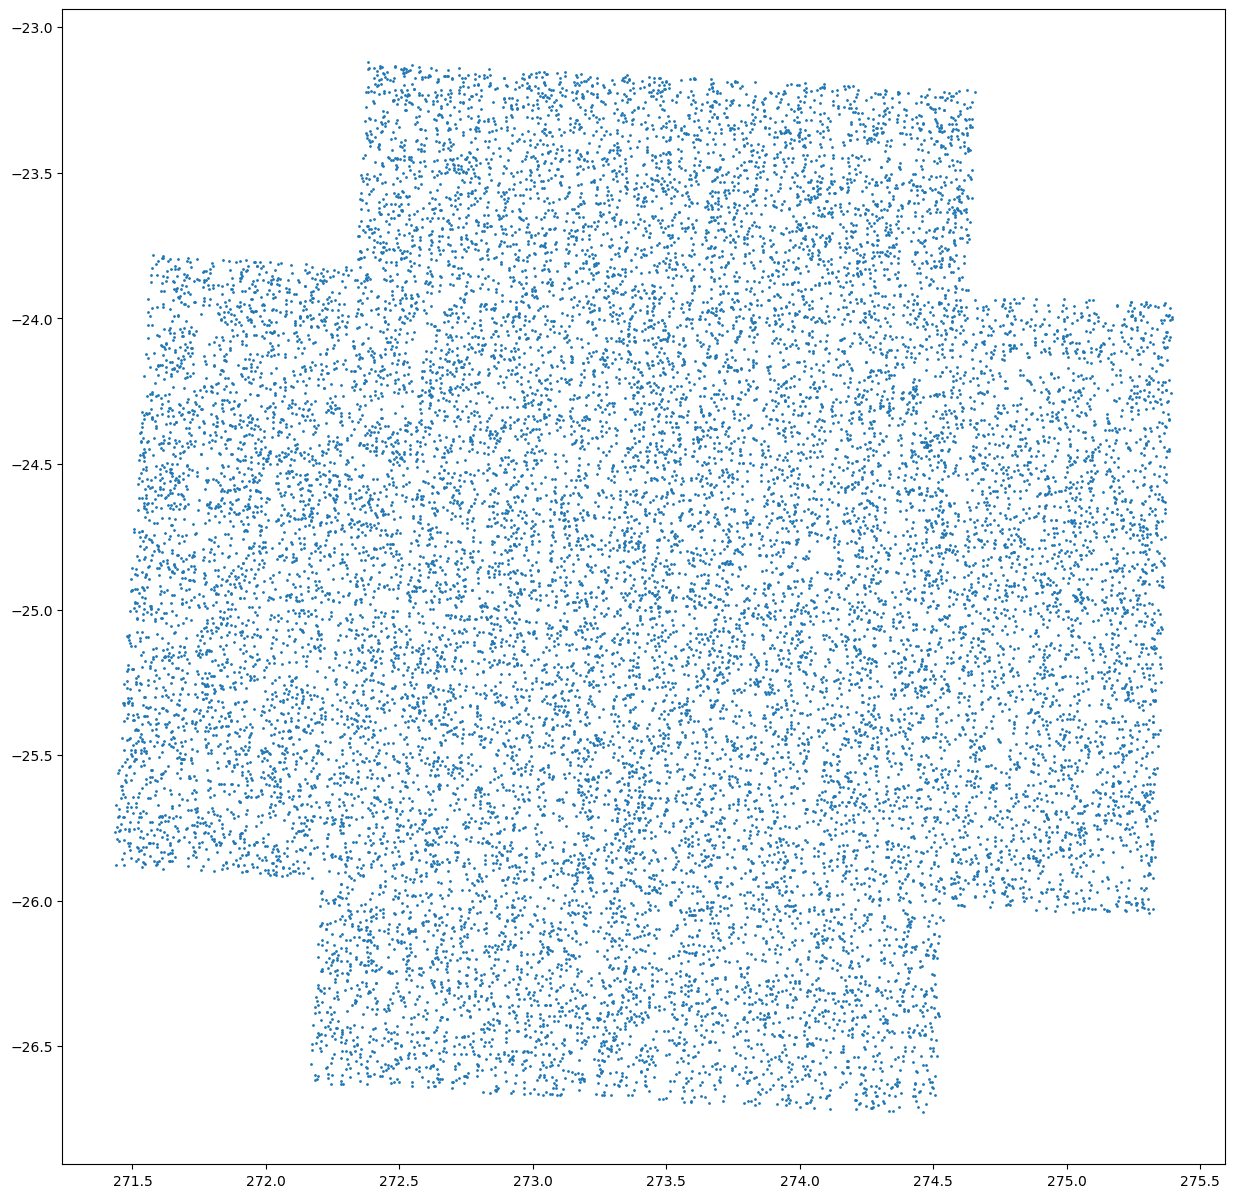

In [15]:
plt.figure(figsize=(15, 15))
plt.scatter(dfobs_in_fp['RA_deg'],dfobs_in_fp['Dec_deg'],s=1.)
plt.show()